<a href="https://colab.research.google.com/github/lauracline/Statistical-Learning-Cookbooks/blob/master/Tree_Based_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tree Based Methods**

The fan favourite decision tree and its family, the random forest and the kaggle champion gradient boosting tree will be discussed here. Decision trees are simple, easy to interpret and give very good results when bagged and boosted. 

## **Decision Trees**

Decision trees can be applied to both regression and classification. Decision trees are graphics where you start at the "root" and traverse your way down by making decisions at the "branches" before finally ending up at a "leaf that gives you the prediction. 

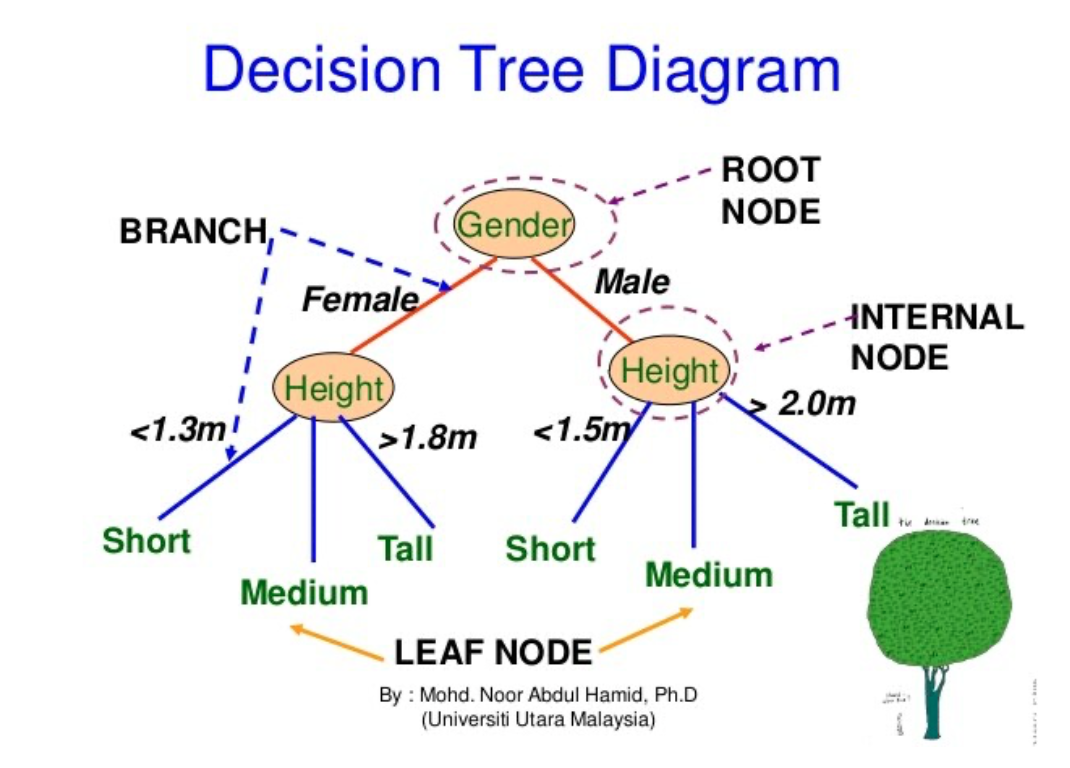

These notes describe two general steps for building a (regression) decision tree:

1. Divide the predictor space into j number of regions 
2. For each region, find the mean response and use it as the predicted value. This will minimize the squared error for that region. 

The regions in theory can be divided into any crazy manner you choose, but in practice, they are divided into high dimensional rectangles, as seen below. For example, you could have used a line with a non-zero slope to partition the region below to get a more accurate fit, but simplicity wins here and we just split on horizintal and vertical lines - "high dimensional rectangles". 

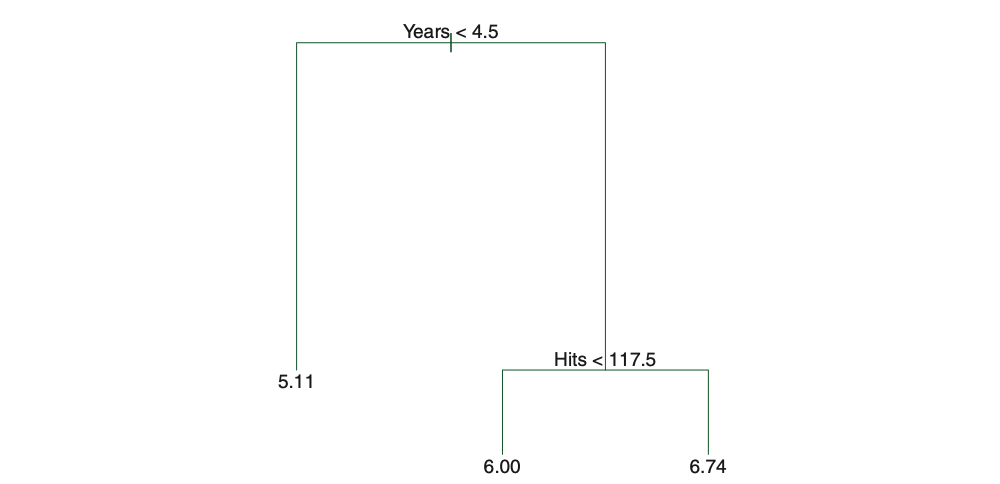

### **How Do We Get The Branches**

We could try and just every tree imaginable and find the tree with the lowest squared error, but this is computationally infeasible even for a relatively small number of predictors. Instead, a greedy approach is used by building the tree one branch at a time. The first branch is constructed by testing out many different binary splits of data. 

For example, $X_{1}<5$ and $X_{1}>=5$ would be one potential split. $X_{2}=Yes$ and $X_{2}= No$ could be considered another binary split. Whichever split yields the lowest squared error would be considered the best split and that split would be chosen for the first branch. This process now continues for each branch interactively until some stopping criteria is met (maximum number of branches, minimum number of observations in a certain branch, etc.)

### **Tree Pruning**

It is possible to build a decision tree so specific (one with so many branches) that each observation can be predicted exactly. This would be a complete memorization (i.e., overfitting the data). Because we want to have the tree work with unseen data, we can prune the tree. 

One strategy is having some threshold for stopping a branch from splitting - it must have decreased the RSS by a certain amount. Since this might miss and good split deeper in the tree, pruning is preferred. 

Pruning works by:

1. Growing a very large tree and stopping only when a minimum number of observations are left in each branch. 
2. At each stage during the growing process, we add a penalty term $\alpha|T|$ to RSS where $|T|$ is the number of terminal nodes. 
3. This would give a function that maps $\alpha$ to a particular subtree. So $\alpha = 0$ would map to the original huge tree and for example $\alpha = 5$ could map to a tree with only half of the terminal nodes. 

Choose $\alpha$ through cross validation by:

1. Splitting training data into K folds
2. Grow a large tree and apply a penalty term exactly as above (map each $\alpha$ to a particular subtree)
3. Evaluate each $\alpha$ (subtree) on the left-out fold
4. Average all the $\alpha$ (subtrees) for each iteration of K-folds

Then use this $\alpha$ to choose the tree from above. 

### **Classification Trees**

Predict at each note, the most commonly occuring class. 

#### **How to Determine Splits**

Three different metrics can be used. First, let $\hat{p}_{mk}$ be the proportion of region *m* with class *k*. Remember that there can be many classes, not just two. 

1. **Classification Error Rate**: $1 - max(\hat{p}_{mk})$. This means 1 - (the most common class). 
2. **Gini Index**: $\sum\limits_{k=1}^{K} \hat{p}_{mk} (1 - \hat{p}_{mk})$
3. **Cross Entropy**: -$\sum\limits_{k=1}^{K} \hat{p}_{mk} log\hat{p}_{mk}$

Cross entropy and the Gini are similiar in that numbers close to 0 or 1 will yield low scores. Gini and cross entropy take into account each class proportion while classification error rate only takes into account the highest occuring class. 

### **Linear Model vs. Trees**

If the decision boundary is linear and not rectangular, then linear models can perform better than trees but for highly non-linear decision boundaries then trees can perform better. 

## **Bagging**

**Bootstrap Aggregation** - a procedure for lowering variance of decision trees. 

* **Bootstrapping**: taking repeated sample with replacement and using each sample as an input into a learning method
* **Aggregation**: for regression, average each prediction from each of these bootstrapped data sets. For classification, use majority vote. 

### **Validation With Out-of-Bag Error**

Each bootstrap sample will contain on average 2/3 of the data points (because of sampling with replacement). We can use the left over 1/3 as a validation set and record errors for each point not in the sample. 

### **Variable Importance**

The wonderful thing about decision trees is their ease of interpretability. Bagging reduces this tremendously sicne we are averaging decisions together. We can use the average amount of decrease in RSS/Gini-index that happens for each time a split happens with a particular predictor. Generally, those predictors that are used higher up in the trees will cause a more massive decrease in RSS/Gini-index. 

## **Random Forests**

Random Forests combine bagging with one additional feature - and that is to limit the features to split on at each node. Instead of being able to split the data on any feature, only a subset of features are considered at each stage. A typical choice is the square root of the number of predictors. This ensures that the trees will look quite different and not nearly as correlated as bagged trees would be. This also makes the trees significantly "dumber" as they can only split on whatever random predictors it gets. 

## **Boosting** 

Boosting can be used (like bagging) for many different learning algorithms. Trees are grown sequentially. Each tree is grown using information from a previous tree. Boosting learns slowly. An tree is fit to teh *residuals* of the model and not the outcome Y. Each tree can be small with just a few terminal nodes. The new trees keep focusing on areas where the model performs poorly. For classification problems, the log-odds are used to find the residuals. 

Parameters to model:

* B - the number of trees to fit
* d - the maximum number of terminal nodes for each tree
* $\lambda$ - learning parameter that determines how much weight to assign to each tree

Add up all threes (times $\lambda$) together to get the final model. 

### **Ensemble of Weak Learners**

Random Forest and Boosted trees are two excellent algorithms that both use 'weak' learners. On their own, each learner is quite terrible but when combined together with many, make them very powerful, more powerful than an expert in many cases. 

## **Resources**

**Leo Breiman - Random Forest Creator** 

Excellent site and a fairly easy read:

https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm



**Extreme Gradient Boosting (XGBoost)**

Winner of many Kaggle competitions. See an explanation of the algorithm here:

https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d



**Extremely Random Trees**

Random forests where onyl a random subset of the cutpoints are allowed. Choose the best cutpoint from that random set. 

https://scikit-learn.org/stable/modules/ensemble.html#extremely-randomized-trees


## **Questions**

### **Question Two**

Boosting using depth-one trees (or *stumps*) leads to an *additive* model: that is, a model of the form:

$f(X) = \sum\limits_{j=1}^{p} f_{j}(X_{j})$. 

Explain why this is the case. 

**Answer:**

A sum of one-depth trees are basis functions with indicator variables and a sum of basis functions is an additive model. 

### **Question Three**

Consider the Gini index, classification error, and entropy in a simple classification setting with two classes. Create a single plot that displays each of these quantities as a function of $\hat{p}_{m1}$. The x-axis should display $\hat{p}_{m1}$, ranging from 0 to 1, and the y-axis should display the Gini index, classification error, and entropy. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
p1 = np.linspace(0.001, 0.9999, 1000)
p2 = 1 - p1

In [3]:
classification_error = 1 - np.column_stack((p1, p2)).max(axis=1)
gini = p1 * (1 - p1) + p2 * (1 - p2)
entropy = -(p1 * np.log(p1) + p2 * np.log(p2))

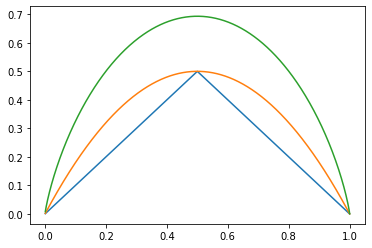

In [5]:
plt.plot(p1, classification_error)
plt.plot(p1, gini)
plt.plot(p1, entropy)

## **Question Five**

Suppose we produce ten bootstrapped samples from a dataset containing red and green classes. We then apply a classification tree to each bootstrapped sample and, for a specific value of X, produce 10 estimates of P(Class is Red|X):

0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, and 0.75. 

There are two common ways to combine these results together into a single class prediction. One is the majority vote approach. The second approach is to classify based on the average probability. In this example, what is the final classification under each of these two approaches. 

**Answer:**

Majority Vote: Choose Red
* Non-Red: 4 Votes
* Red: 6 Votes

Average Probability: Choose Green (Mean = 0.45)


In [6]:
# average probability: choose green
np.mean([0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75])

0.45

### **Question Six**

Provide a detailed explanation of the algorithm that is used to fit a regression tree. 

**Answer:**

For a regression tree, look through each feature and for each feature split the feature into two parts for each unique value of that feature and calculate RSS. Choose first split with lowest RSS. 

Now you have two nodes, repeat procedure until only a set number of observations are left in each node. 

### **Question Seven**

We can apply random forests to the `Boston` data using `mtry=6` and using `ntree=25` and `ntree=500`. Create a split displaying the test error resulting from random forests on this dataset for a more comprehensive range of values for `mtry` and `ntree`. Describe the results obtained. 

In [7]:
import pandas as pd
boston = pd.read_csv('https://raw.githubusercontent.com/emredjan/ISL-python/master/datasets/Boston.csv')

In [8]:
boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
X = boston.iloc[:, :-1]
y = boston['medv']

In [18]:
from collections import defaultdict

In [19]:
max_features_dict = defaultdict(list)

In [20]:
max_features = range(1, X.shape[1] + 1)
num_trees = [5, 10, 20, 30, 50, 70, 100, 150, 200, 250, 300, 400, 
             500, 600, 700, 800, 900, 1000]

In [21]:
for mf in max_features:
    for nm in num_trees:
        clf = RandomForestRegressor(oob_score=True, max_features=mf, n_estimators=nm)
        clf.fit(X, y)
        max_features_dict[mf].append(clf.oob_score_)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


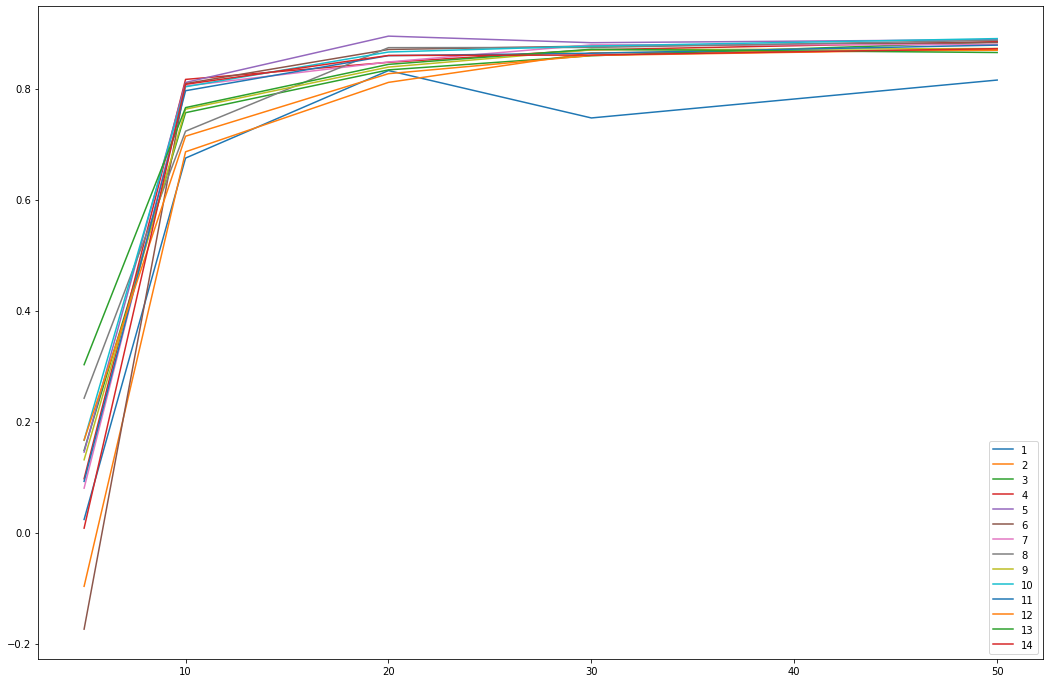

In [22]:
plt.figure(figsize=(18,12))
for mf, values in max_features_dict.items():
  plt.plot(num_trees[:5], values[:5], label=mf)
plt.legend(loc=4)

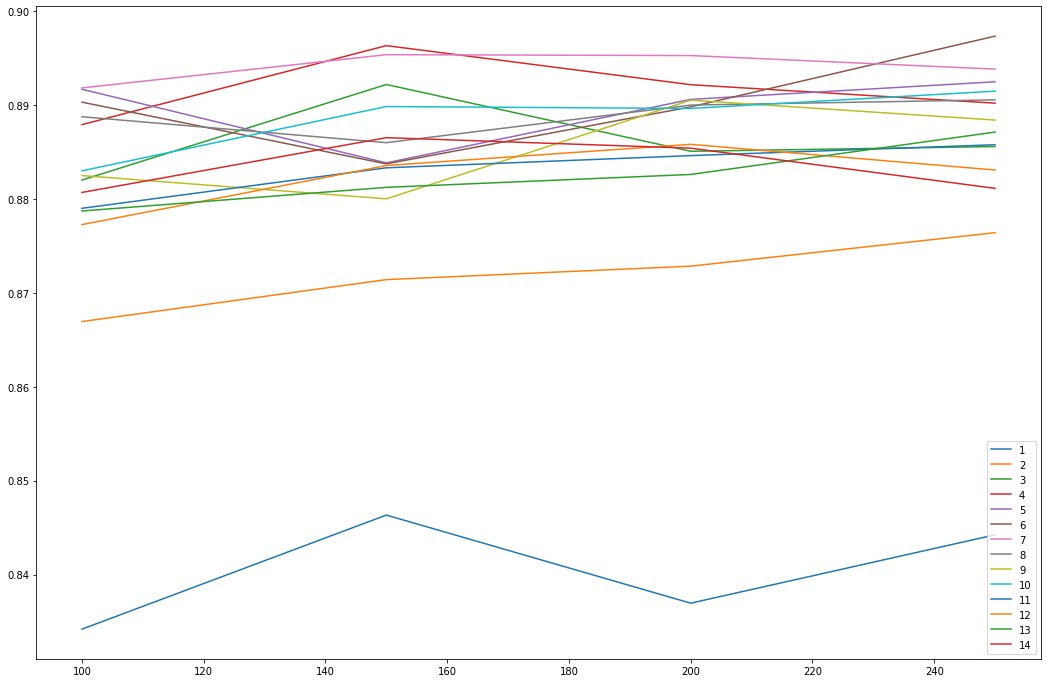

In [23]:
plt.figure(figsize=(18,12))
for mf, values in max_features_dict.items():
  plt.plot(num_trees[6:10], values[6:10], label=mf)
plt.legend(loc=4)

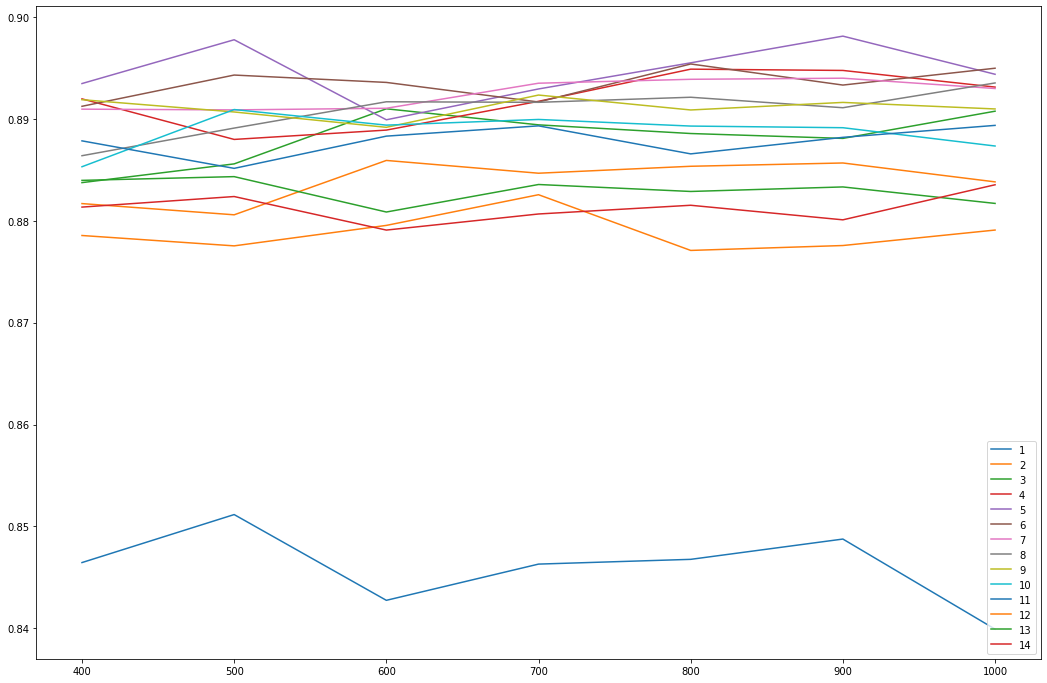

In [24]:
plt.figure(figsize=(18,12))
for mf, values in max_features_dict.items():
  plt.plot(num_trees[11:], values[11:], label=mf)
plt.legend(loc=4)

## **Conclusion**

Note much difference in R-Squared after 20 trees and at least three predictor variables used at each node. 

In [26]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [27]:
clf = DecisionTreeRegressor()

In [28]:
carseats = pd.read_csv('https://raw.githubusercontent.com/emredjan/ISL-python/master/datasets/Carseats.csv')

In [29]:
carseats.head()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [30]:
carseats = pd.get_dummies(carseats, drop_first=True)

In [31]:
carseats.head()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,1,9.50,138,73,11,276,120,42,17,0,0,1,1
1,2,11.22,111,48,16,260,83,65,10,1,0,1,1
2,3,10.06,113,35,10,269,80,59,12,0,1,1,1
3,4,7.40,117,100,4,466,97,55,14,0,1,1,1
4,5,4.15,141,64,3,340,128,38,13,0,0,1,0


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X = carseats.iloc[:, 1:]
y = carseats['Sales']
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [34]:
clf.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [35]:
from IPython.display import Image

In [36]:
from sklearn.externals.six import StringIO

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [37]:
import pydot
dot_data = StringIO()

In [38]:
export_graphviz(clf, out_file=dot_data)

In [39]:
dot_data

In [42]:
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_png('carseats_tree.png')

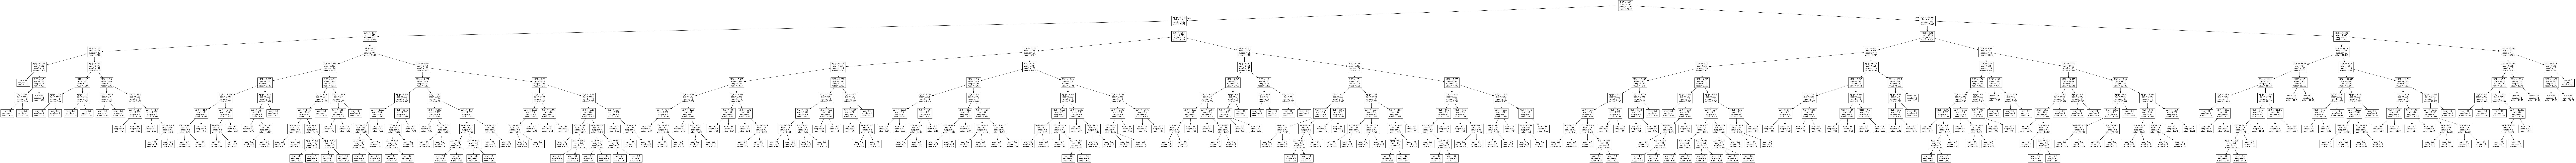

In [47]:
from IPython.display import Image
Image('carseats_tree.png')